In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df=pd.read_csv('dataset/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(columns=['country','gender'],inplace=True)
df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


## EDA

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB
None


In [5]:
# Display summary statistics of numerical columns
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [6]:
# Count the number of missing values in each column
print(df.isnull().sum())

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [7]:
# Count the number of duplicated values
df.duplicated().sum()

0

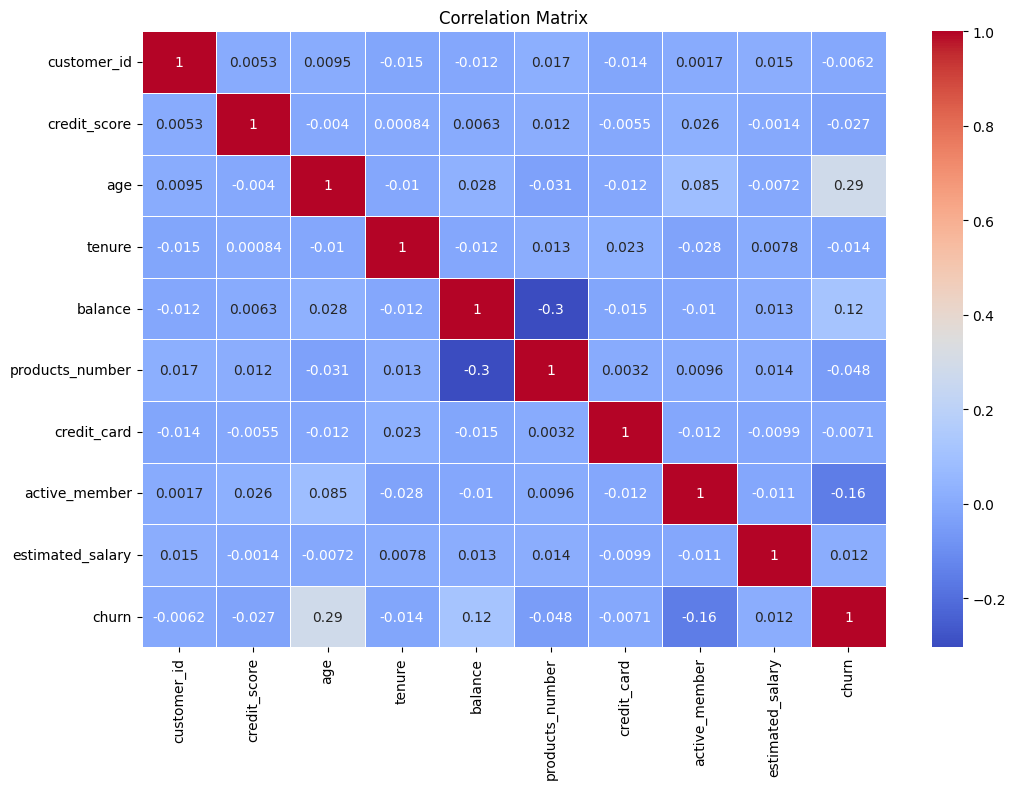

In [8]:
# Visualize the correlation matrix using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

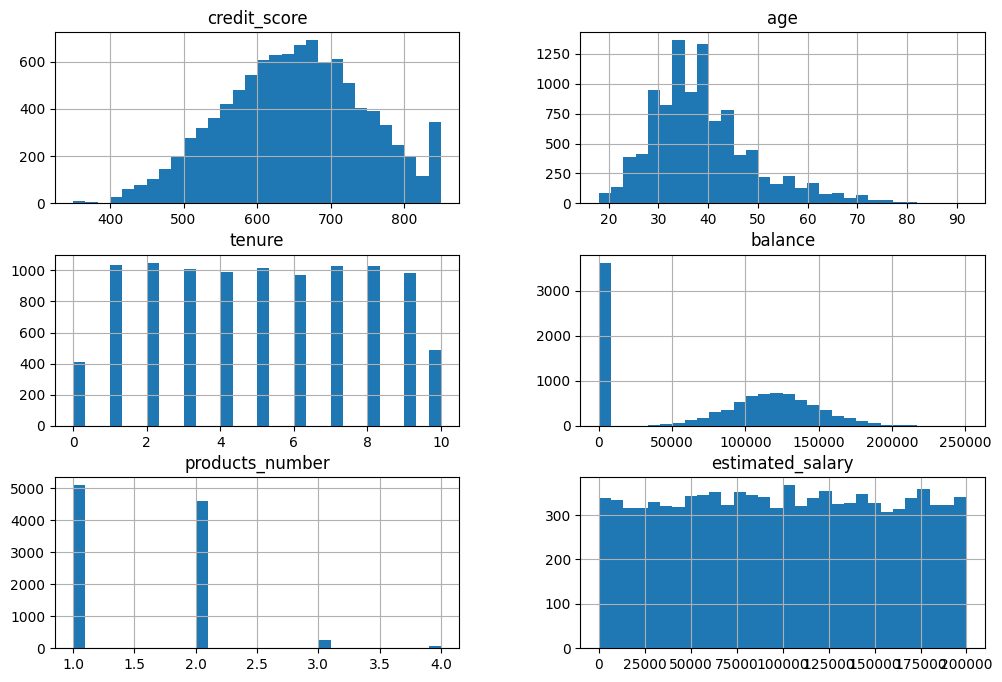

In [9]:
# Visualize the distribution of numeric features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numeric_features].hist(bins=30, figsize=(12, 8))
plt.show()

In [10]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

### Data Preprocessing & Spilt Data 

In [11]:
#Data Split
X=df.drop(columns=["churn"])
y=df['churn']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_trained_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

### Model training and Evalution

#### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the model on the training data
clf.fit(X_trained_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred_RFR = clf.predict(X_test_scaled)

In [17]:
# Calculate accuracy
accuracy_RFR = accuracy_score(y_test, y_pred_RFR)
print("Accuracy:", accuracy_RFR)

Accuracy: 0.851


In [18]:
# Generate a classification report
print(classification_report(y_test, y_pred_RFR))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1575
           1       0.76      0.44      0.56       425

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



#### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_classifier.fit(X_trained_scaled, y_train)

# Evaluate the Decision Tree model
tree_pred = tree_classifier.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)


Decision Tree Accuracy: 0.7775


#### XGBoost Classifier

In [22]:
pip install xgboost
# import xgboost as xgb

# # Create an XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier(random_state=42)

# # Train the model on the training data
# xgb_classifier.fit(X_trained_scaled, y_train)

# # Evaluate the model
# y_pred_xgb = xgb_classifier.predict(X_test_scaled)
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print("XGBoost Accuracy:", accuracy_xgb)


SyntaxError: invalid syntax (509402679.py, line 1)

In [ ]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_RFR)
print("Confusion Matrix:")
print(cm)

In [ ]:


# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [ ]:
# Get the list of feature names
feature_names = X_train.columns.tolist()
feature_names

In [ ]:
# Choose a specific data point for which you want to explain the prediction
sample_index = 96 
sample_instance = X_test.iloc[sample_index]
sample_instance

## Add Explainable AI 

In [ ]:
import shap

# Create a SHAP explainer for the model
explainer_shap = shap.Explainer(clf, X_train, feature_names=feature_names)


In [ ]:
# Calculate Shapley values for the entire test set
shap_values = explainer_shap.shap_values(X_test)

In [ ]:
# shap.summary_plot(shap_values,sample_instance,plot_type='bar')

In [ ]:
# Visualize the Shapley values for the same instance you explained with LIME
shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values[1][sample_index], sample_instance, feature_names=feature_names)

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=feature_names)


In [ ]:
# Explain the model prediction for the selected instance
explanation = explainer.explain_instance(sample_instance, clf.predict_proba)

In [ ]:
# Visualize the explanation
explanation.show_in_notebook()

## Save Model

In [ ]:
import pickle

# Save the Random Forest model (or any other model of your choice)
with open('models/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)
